In [1]:
#!/usr/bin/env python

#import main dir in sys path
import sys
DIR_PATH = '/Users/debryas/Desktop/PhD_work/HNL_tau_analysis/hnl-coffea-analysis'
sys.path.append(DIR_PATH)

from coffea.nanoevents import NanoAODSchema
from coffea import processor
from coffea import hist
NanoAODSchema.warn_missing_crossrefs = True
from cycler import cycler
import pickle
import matplotlib.pyplot as plt
import numpy as np
import warnings
import os
import awkward as ak

from helpers import files_from_path
from samples.samples import signal_samples, Data_samples, MCbackground_samples
from xsecs import xsecs
from figures.plot_helpers import compute_lumi, ratio_plot_DeepTau, ratio_plot_stitching

from DeepTauComparaison.HNLAnalysis_ttm_new import HNLAnalysis_ttm_new
from DeepTauComparaison.HNLAnalysis_ttm_old import HNLAnalysis_ttm_old
from DeepTauComparaison.HNLAnalysis_ttm_old_sftau import HNLAnalysis_ttm_old_sftau

In [2]:
# parameters
tag = 'TEST3'
channel = 'ttm'
signal_region = 'D' 
save_dir = DIR_PATH+'/figures/DeepTauComparaison/'+tag+'/'+channel+'/' #directory where to store figures

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

In [3]:
#compute the luminosity of data sample
luminosity = {}
for element in Data_samples:
    luminosity[element] = compute_lumi(element)

#compute the integrated luminosity of data samples for area A, B, C and D in /pb
lumi_EGamma_2018 = 0
lumi_SingleMuon_2018 = 0
lumi_Tau_2018 = 0
for element in Data_samples:
    if element[:-1] == 'EGamma_2018':
        lumi_EGamma_2018 += luminosity[element]
    if element[:-1] == 'SingleMuon_2018':
        lumi_SingleMuon_2018 += luminosity[element]
    if element[:-1] == 'Tau_2018':
        lumi_Tau_2018 += luminosity[element]

# store all the samples 
Data_samples_merged = {}
for s in Data_samples:
    Data_samples_merged[s[0:-1]] = Data_samples[s]
samples = {**signal_samples, **Data_samples_merged, **MCbackground_samples}

#list of background, hnl and data to be plot
main_background = [
    'WZ',
    ]

Drell_Yan = [
    'DYJetsToLL_M-50',
    'DYJetsToLL_0J',
    'DYJetsToLL_1J',
    'DYJetsToLL_2J',
    'DYJetsToLL_LHEFilterPtZ-0To50',
    'DYJetsToLL_LHEFilterPtZ-50To100',
    'DYJetsToLL_LHEFilterPtZ-100To250',
    'DYJetsToLL_LHEFilterPtZ-250To400',
    'DYJetsToLL_LHEFilterPtZ-400To650',
    'DYJetsToLL_LHEFilterPtZ-650ToInf'
    ]

WJetsToLNu = [
    'WJetsToLNu',
    'W1JetsToLNu',
    'W2JetsToLNu',
    'W3JetsToLNu',
    'W4JetsToLNu',
    'WJetsToLNu_HT-70To100',
    'WJetsToLNu_HT-100To200',
    'WJetsToLNu_HT-200To400',
    'WJetsToLNu_HT-400To600',
    'WJetsToLNu_HT-600To800',
    'WJetsToLNu_HT-800To1200',
    'WJetsToLNu_HT-1200To2500',
    'WJetsToLNu_HT-2500ToInf'
    ]

other_background = [
    'TT_To_2L2Nu',
    'EWK_WMinus2Jets_W_To_LNu_M-50',
    'EWK_WPlus2Jets_W_To_LNu_M-50',
    'EWK_Z2Jets_Z_To_LL_M-50',
    'ST_t-channel_antitop_4f_InclusiveDecays',
    'ST_t-channel_top_4f_InclusiveDecays',
    'ST_tW_antitop_5f_inclusiveDecays',
    'ST_tW_top_5f_inclusiveDecays',
    'TT_To_Hadronic',
    'TT_To_SemiLeptonic',
    'TTWJets_To_LNu',
    'TTWW',
    'TTWZ',
    'TTZ_To_LLNuNu_M-10',
    'TTZZ',
    'ZZ',
    'WW',
    'WWW',
    'WWZ',
    'WZZ',
    'ZZZ']

backgrounds = main_background + Drell_Yan + WJetsToLNu + other_background

data = ['SingleMuon_2018']

#sample that need to be scaled
scale_samples = backgrounds

plot_scale = {}
for s in scale_samples:
    plot_scale[s]= 1.

# var_name [binning ,min , max] --> from HNLanalysis.get_var_axis_pairs()
var_axis = {
    "pt"  : [300, 0., 1500.], # pt axis
    "et" : [30,  -3.1415927, 3.1415927], # eta axis
    "ph" : [30, -3.1415927, 3.1415927], # phi axis
    "ma": [300, 0., 1500.], # mass axis
    "dr"  : [30, 0., 5.], # dr axis
    "mc"  : [300, 0., 1500.], # mc axis
    "co"  : [300, 0., 1500.], # combined mass has mc axis
    "me" : [30, 0., 300.], # met axis
    "mT"  : [300, 0., 1500.] # mass transverse axis
}

For DeepTau version new

Sum of QCD events in region A: 99.79
Sum of QCD events in region B: 1.57
QCD extrapolation factor from region (B/A): 0.02

Showing  dr_l1l2


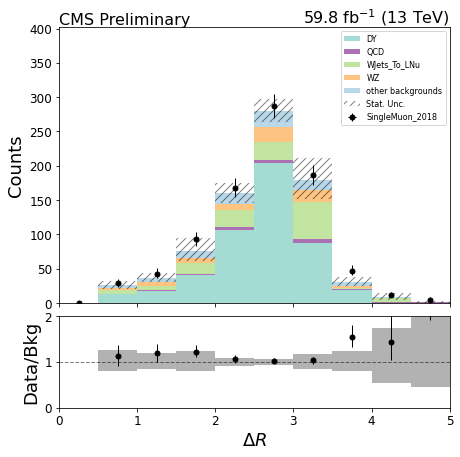

   
Showing  pt_tau1


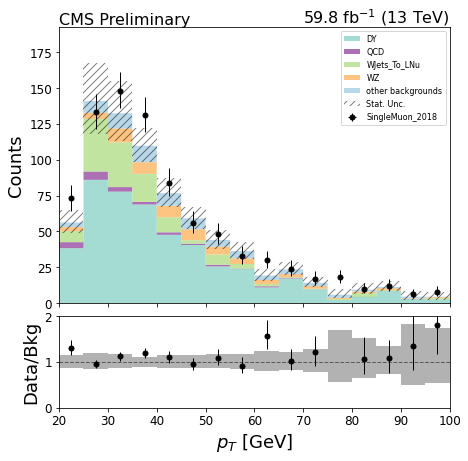

   
Showing  pt_tau2


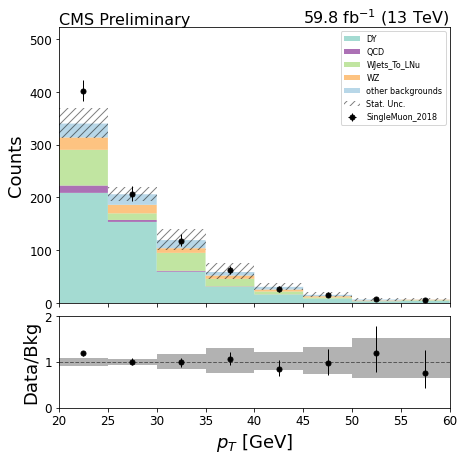

   
Showing  pt_mu1


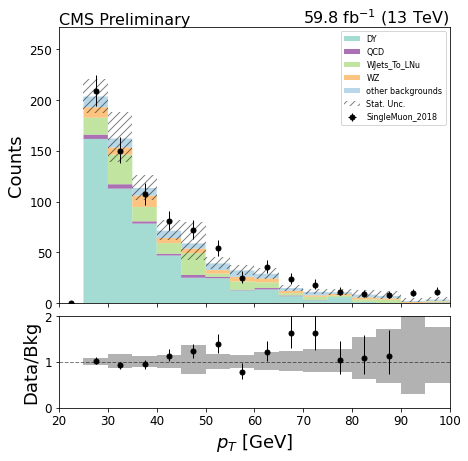

   
Showing  pt_sum_l1l2l3


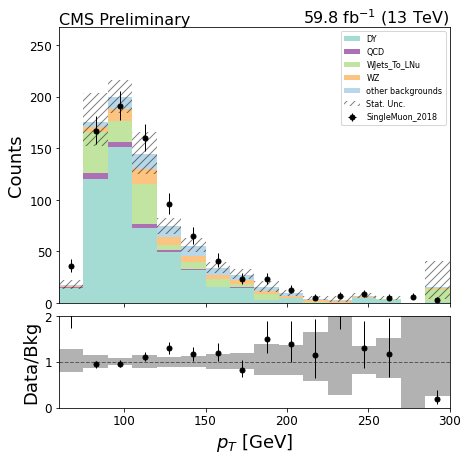

   
Showing  pt_sum_l1l2MET


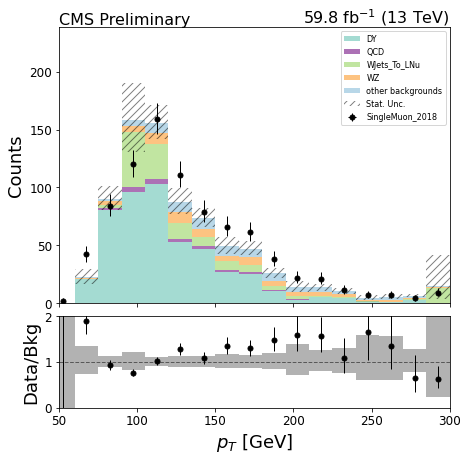

   
Showing  mT_tautau


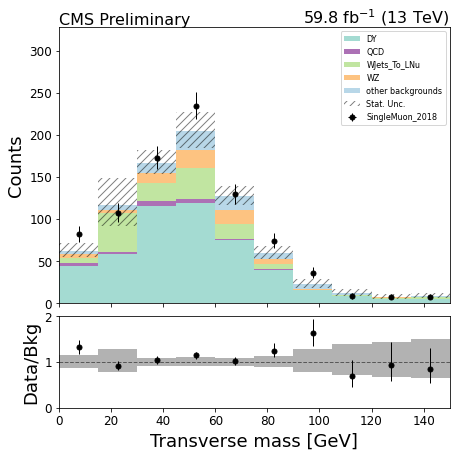

   
Showing  mT_l1MET


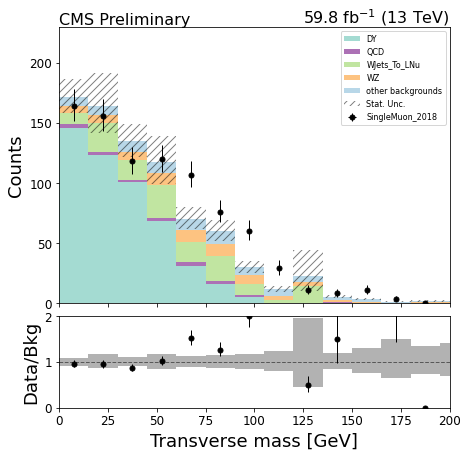

In [5]:
deeptauversion = 'new' # old, new or old_sftau
#for scaling 
data_name='SingleMuon_2018'
lumi = lumi_SingleMuon_2018

var_to_plot = {
        #name_of_var:[binning,xlim_min,xlim_max, ylim],
        'dr_l1l2':[10,0,5.,0.4],
        'pt_tau1':[300,20,100,0.3],
        'pt_tau2':[300,20,60,0.3],
        'pt_mu1':[300,20,100,0.3],
        'pt_sum_l1l2l3':[100,60,300,0.4],
        'pt_sum_l1l2MET':[100,50,300,0.5],
        'mT_tautau':[100,0,150,0.4],
        'mT_l1MET':[100,0,200,0.4] }


print('For DeepTau version ' + deeptauversion)
print('')
#load results
with open(f'{DIR_PATH}/results/result_{tag}_{deeptauversion}_region{signal_region}.pkl', 'rb') as f:
    result = pickle.load(f)

with open (f'{DIR_PATH}/results/counter_deeptau_{tag}.pkl', 'rb') as f:
    event_counter = pickle.load(f)

# for QCD background estimation:
#load results region A
with open(f'{DIR_PATH}/results/result_{tag}_{deeptauversion}_regionA.pkl', 'rb') as f:
    result_regionA = pickle.load(f)

#load results region B
with open(f'{DIR_PATH}/results/result_{tag}_{deeptauversion}_regionB.pkl', 'rb') as f:
    result_regionB = pickle.load(f)
    
#load results region C
with open(f'{DIR_PATH}/results/result_{tag}_{deeptauversion}_regionC.pkl', 'rb') as f:
    result_regionC = pickle.load(f)

scales = {s:plot_scale[s]*lumi*xsecs[s]/event_counter['sumw'][s] for s in scale_samples}

#compute scale factor TF = N(B) / N(A)
backgrounds_regionA = 0
backgrounds_regionB = 0
for background in (backgrounds):
    backgrounds_regionA = backgrounds_regionA + result_regionA['sumw_corrections'][background]*scales[background]
    backgrounds_regionB = backgrounds_regionB + result_regionB['sumw_corrections'][background]*scales[background]
NA = result_regionA['sumw_corrections'][data_name] - backgrounds_regionA
NB = result_regionB['sumw_corrections'][data_name] - backgrounds_regionB
TF = NB/NA
print("Sum of QCD events in region A: {:.2f}".format(NA))
print("Sum of QCD events in region B: {:.2f}".format(NB))
print("QCD extrapolation factor from region (B/A): {:.2f}".format(TF))
print('')

for var in list(var_to_plot):
    try:
        if (len(result[var].values()) == 0):
            print(var, 'is empty')
            continue

        print('Showing ', var)

        result[var].scale(scales, axis='ds')
        result_regionC[var].scale(scales, axis='ds')

        #Estimation of QCD in region C
        result_regionC_backgrounds = result_regionC[var][backgrounds]
        result_regionC_data = result_regionC[var][data]
        result_regionC_backgrounds.scale(-1.)
        result_regionC_all = result_regionC_backgrounds + result_regionC_data
        mapping_all = {
            'QCD': backgrounds+data,
        }
        QCD_regionC = result_regionC_all.group("ds", hist.Cat("ds", "QCD"), mapping_all)
        
        # QCD background estimation in signal region
        QCD_regionC.scale(TF)

        # make a nice ratio plot
        data_hist = result[var][data_name]
        BCK_histo = result[var][backgrounds]

        mapping = {
            #'main background': main_background,
            'WZ': 'WZ',
            'WJets_To_LNu': WJetsToLNu,
            'DY': Drell_Yan,
            'other backgrounds': other_background
        }

        BCK_histo = BCK_histo.group("ds", hist.Cat("ds", "Combined backgrounds samples"), mapping)
        BCK_histo = BCK_histo + QCD_regionC

        # NLO NNLO norm correction
        BCK_histo[var]['DY'].scale(6077.22/6441.9)
        BCK_histo[var]['WJets_To_LNu'].scale(61526.7/53870.0)

        # we create the histograms of all the other backgrounds + QCD with ABCD method
        if var[0:2] == 'pt':
            data_hist = data_hist.rebin("pt", hist.Bin("pt", r"$p_{T}$ [GeV]", var_to_plot[var][0], var_axis[var[0:2]][1], var_axis[var[0:2]][2]))
            BCK_histo = BCK_histo.rebin("pt", hist.Bin("pt", r"$p_{T}$ [GeV]", var_to_plot[var][0], var_axis[var[0:2]][1], var_axis[var[0:2]][2]))

        if var[0:2] == 'mT':
            data_hist = data_hist.rebin("mt", hist.Bin("mt", r"Transverse mass [GeV]", var_to_plot[var][0], var_axis[var[0:2]][1], var_axis[var[0:2]][2]))
            BCK_histo = BCK_histo.rebin("mt", hist.Bin("mt", r"Transverse mass [GeV]", var_to_plot[var][0], var_axis[var[0:2]][1], var_axis[var[0:2]][2]))

        if var[0:2] == 'dr':
            data_hist = data_hist.rebin("dr", hist.Bin("dr", r"$\Delta R$", var_to_plot[var][0], var_axis[var[0:2]][1], var_axis[var[0:2]][2]))
            BCK_histo = BCK_histo.rebin("dr", hist.Bin("dr", r"$\Delta R$", var_to_plot[var][0], var_axis[var[0:2]][1], var_axis[var[0:2]][2]))
        
        ratio_plot_DeepTau(data_hist, BCK_histo, var, save_dir+deeptauversion+'/', xlim = [var_to_plot[var][1],var_to_plot[var][2]], ylim=var_to_plot[var][3], luminosity = lumi)

        print('   ')
        warnings.filterwarnings("default")
    except AssertionError:
        pass